# Lab 8 :  Tree-Based Methods


In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
from statsmodels.datasets import get_rdataset
import sklearn.model_selection as skm
from ISLP import load_data , confusion_table
from ISLP.models import ModelSpec as MS

In [ ]:
from sklearn.tree import (DecisionTreeClassifier as DTC , DecisionTreeRegressor as DTR , plot_tree , export_text)
from sklearn.metrics import (accuracy_score , log_loss)
from sklearn.ensemble import  (RandomForestRegressor as RF, GradientBoostingRegressor as GBM) 
from ISLP.bart import BART

### CarSeats Datasets 

In [4]:
Carseats = load_data('Carseats')
High = np.where(Carseats.Sales > 8, 
                'Yes', 
                'No')

In [5]:
Carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [8]:
High[:5]

array(['Yes', 'Yes', 'Yes', 'No', 'No'], dtype='<U3')

In [10]:
model = MS(Carseats.columns.drop('Sales'), intercept=False)
D = model.fit_transform(Carseats)
features_name = list(D.columns)
X = np.asarray(D)

In [ ]:
D 

,CompPrice,Income,Advertising,Population,Price,ShelveLoc[Good],ShelveLoc[Medium],Age,Education,Urban[Yes],US[Yes]
0,138,73,11,276,120,0.0,0.0,42,17,1.0,1.0
1,111,48,16,260,83,1.0,0.0,65,10,1.0,1.0
2,113,35,10,269,80,0.0,1.0,59,12,1.0,1.0
3,117,100,4,466,97,0.0,1.0,55,14,1.0,1.0
4,141,64,3,340,128,0.0,0.0,38,13,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1.0,0.0,33,14,1.0,1.0
396,139,23,3,37,120,0.0,1.0,55,11,0.0,1.0
397,162,26,12,368,159,0.0,1.0,40,18,1.0,1.0
398,100,79,7,284,95,0.0,0.0,50,12,1.0,1.0


In [15]:
features_name

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc[Good]',
 'ShelveLoc[Medium]',
 'Age',
 'Education',
 'Urban[Yes]',
 'US[Yes]']

In [16]:
X

array([[138.,  73.,  11., ...,  17.,   1.,   1.],
       [111.,  48.,  16., ...,  10.,   1.,   1.],
       [113.,  35.,  10., ...,  12.,   1.,   1.],
       ...,
       [162.,  26.,  12., ...,  18.,   1.,   1.],
       [100.,  79.,   7., ...,  12.,   1.,   1.],
       [134.,  37.,   0., ...,  16.,   1.,   1.]])

In [17]:
clf = DTC(criterion='entropy',
          max_depth=3,
          random_state=0)

clf.fit(X, High)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [ ]:
# Get accuracy 
accuracy_score(High, clf.predict(X))

0.79

In [19]:
resid_dev = np.sum(log_loss(High , clf.predict_proba(X)))
resid_dev

0.4710647062649358

[Text(0.5, 0.875, 'ShelveLoc[Good] <= 0.5\nentropy = 0.977\nsamples = 400\nvalue = [236, 164]'),
 Text(0.25, 0.625, 'Price <= 92.5\nentropy = 0.894\nsamples = 315\nvalue = [217, 98]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Income <= 57.0\nentropy = 0.887\nsamples = 46\nvalue = [14, 32]'),
 Text(0.0625, 0.125, 'entropy = 0.881\nsamples = 10\nvalue = [7, 3]'),
 Text(0.1875, 0.125, 'entropy = 0.711\nsamples = 36\nvalue = [7, 29]'),
 Text(0.375, 0.375, 'Advertising <= 13.5\nentropy = 0.804\nsamples = 269\nvalue = [203, 66]'),
 Text(0.3125, 0.125, 'entropy = 0.687\nsamples = 224\nvalue = [183, 41]'),
 Text(0.4375, 0.125, 'entropy = 0.991\nsamples = 45\nvalue = [20, 25]'),
 Text(0.75, 0.625, 'Price <= 135.0\nentropy = 0.767\nsamples = 85\nvalue = [19, 66]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'US[Yes] <= 0.5\nentropy = 0.523\nsamples = 68\nvalue = [8, 60]'),
 Text(0.5625, 0.125, 'entropy = 0.937\nsamples = 17\nvalue = [6, 11]'),
 Text(0.6875, 0.125, 'entropy = 0.

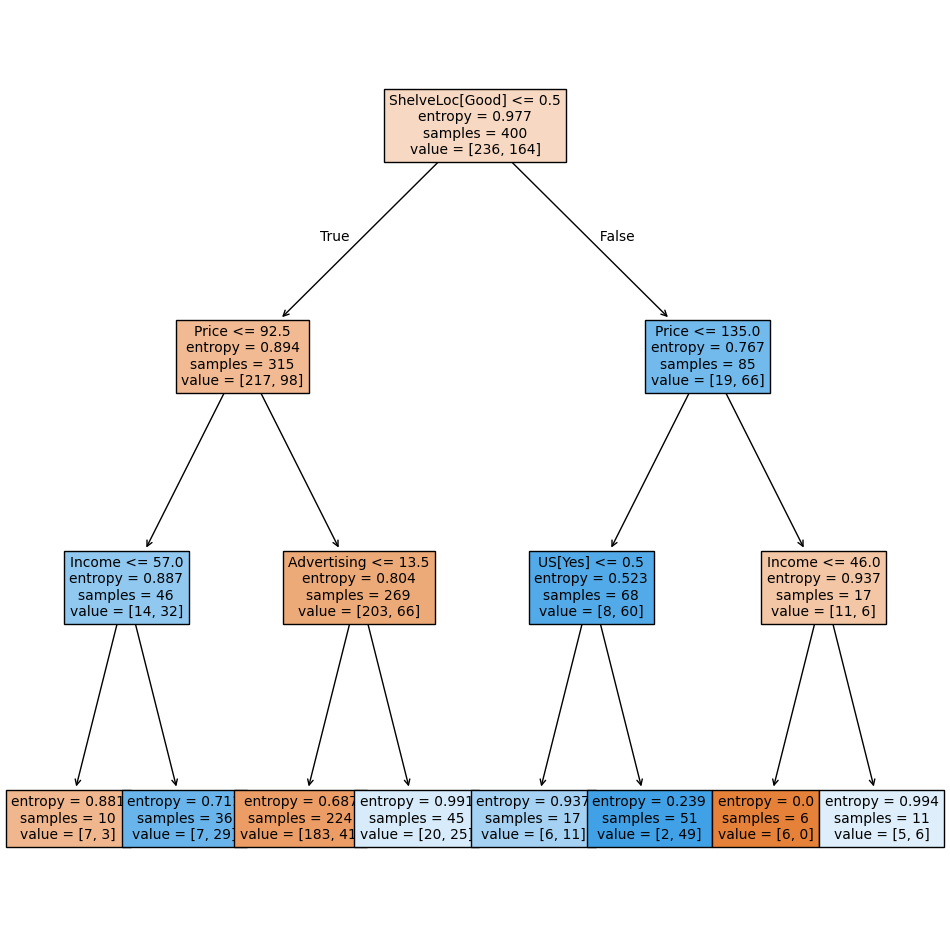

In [21]:
ax = subplots(figsize=(12, 12)) [1]
plot_tree(clf,
          feature_names=features_name,
          filled=True,
          fontsize=10,
          ax=ax)

In [25]:
print(export_text(clf, feature_names=features_name,
                  show_weights=True))

|--- ShelveLoc[Good] <= 0.50
|   |--- Price <= 92.50
|   |   |--- Income <= 57.00
|   |   |   |--- weights: [7.00, 3.00] class: No
|   |   |--- Income >  57.00
|   |   |   |--- weights: [7.00, 29.00] class: Yes
|   |--- Price >  92.50
|   |   |--- Advertising <= 13.50
|   |   |   |--- weights: [183.00, 41.00] class: No
|   |   |--- Advertising >  13.50
|   |   |   |--- weights: [20.00, 25.00] class: Yes
|--- ShelveLoc[Good] >  0.50
|   |--- Price <= 135.00
|   |   |--- US[Yes] <= 0.50
|   |   |   |--- weights: [6.00, 11.00] class: Yes
|   |   |--- US[Yes] >  0.50
|   |   |   |--- weights: [2.00, 49.00] class: Yes
|   |--- Price >  135.00
|   |   |--- Income <= 46.00
|   |   |   |--- weights: [6.00, 0.00] class: No
|   |   |--- Income >  46.00
|   |   |   |--- weights: [5.00, 6.00] class: Yes



In [32]:
validation = skm.ShuffleSplit(n_splits=1,
                              test_size=200,
                              random_state=0)

results = skm.cross_validate(clf , 
                             D,
                             High ,
                             cv=validation)
results['test_score']

array([0.685])

In [31]:
validation

ShuffleSplit(n_splits=1, random_state=0, test_size=200, train_size=None)

In [33]:
(X_train , X_test , High_train , High_test) = skm.train_test_split(X,
                                                                   High ,
                                                                   test_size=0.5,
                                                                   random_state=0)

In [34]:
clf2 = DTC(criterion='entropy', random_state=0)
clf2.fit(X_train , High_train)
accuracy_score(High_test , clf2.predict(X_test))

0.735

In [36]:
ccp_path = clf2.cost_complexity_pruning_path(X_train , High_train)
kfold = skm.KFold(10,
                  random_state=1,
                  shuffle=True)

In [43]:
grid = skm.GridSearchCV(clf2 , 
                        {'ccp_alpha': ccp_path.ccp_alphas},
                        refit=True,
                        cv=kfold,
                        scoring='accuracy')
grid.fit(X_train , High_train)
grid.best_score_

0.685

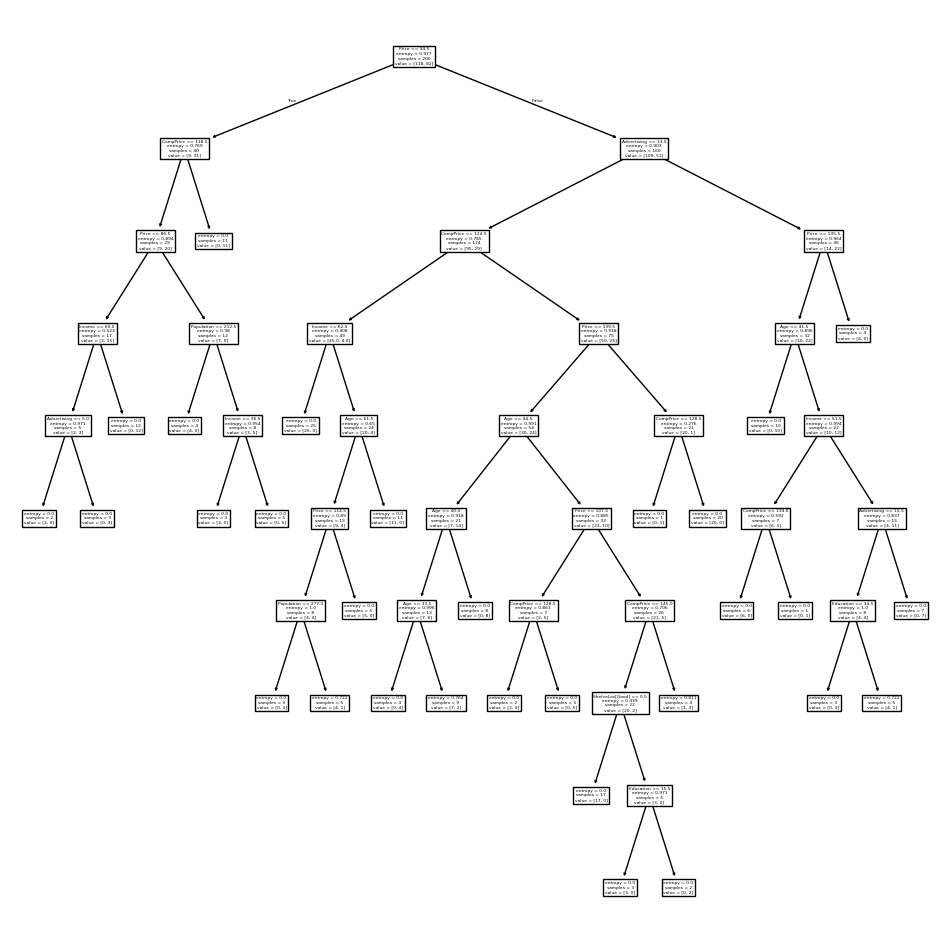

In [44]:
ax = subplots(figsize=(12, 12))[1]
best_ = grid.best_estimator_
plot_tree(best_ , 
          feature_names=features_name,
          ax=ax);

In [45]:
best_.tree_.n_leaves

30

In [46]:
print(accuracy_score(High_test ,
                     best_.predict(X_test)))
confusion = confusion_table(best_.predict(X_test),
                            High_test)
confusion

0.72


Truth,No,Yes
Predicted,,
No,94,32
Yes,24,50
